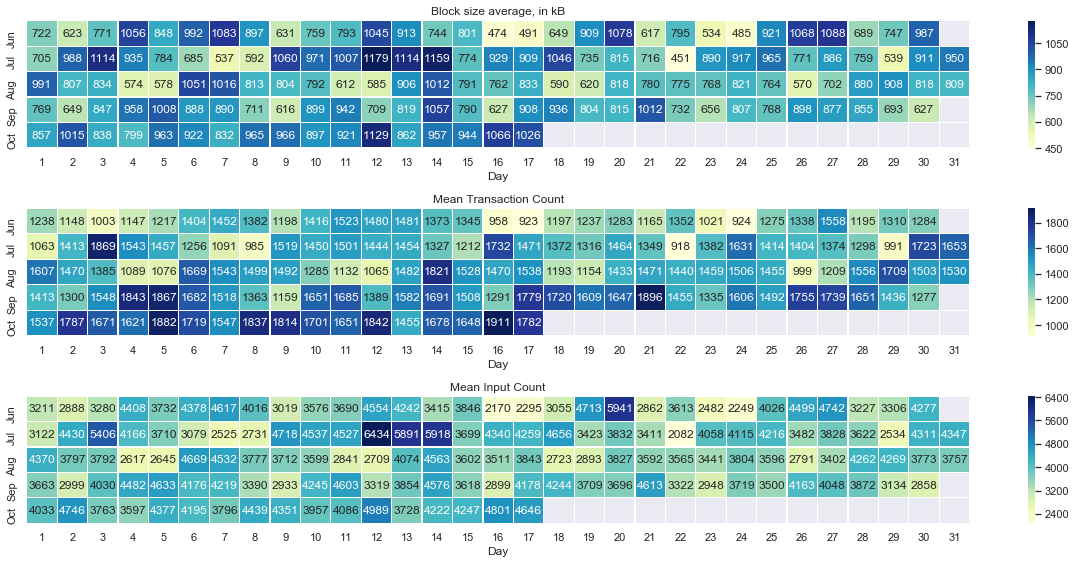

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import date, timedelta, datetime

sns.set(color_codes=True)
t0 = date.today()
t_today = t0

for i in range(4):
    t1 = t0.replace(day=1)
    t2 = t1 - timedelta(days=1)
    t0 = t2 
t0 = t0.replace(day=1)

All_months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
All_months2 = All_months + All_months + All_months
All_months3 = All_months2[(12 + t_today.month - 5) : (24 + t_today.month - 5)]

url_string_3 = ('https://api.blockchair.com/bitcoin/blocks?'+
                'q=time('+str(t0)+'+00:00:00..)'+
                '&u=33c716b7-cf65-4b3b-8784-7f229f30e8cc&'+
                'fields=id,time,transaction_count,input_count,size&export=csv')

Table_BTC_2 = pd.read_csv(url_string_3, delimiter = ',')

# grouping
Table_BTC_2['size_kB'] = [x/1000 for x in Table_BTC_2['size']]

FMT = '%Y-%m-%d %H:%M:%S'

Table_BTC_2['t1'] = [datetime.strptime(y, FMT) for y in Table_BTC_2['time']]

#% .dt.date works for Pandas datetime Series
Table_BTC_3 = Table_BTC_2.groupby([Table_BTC_2['t1'].dt.date]).mean()

Table_BTC_3['Month'] = [x.month for x in Table_BTC_3.index]
Table_BTC_3['Day']   = [x.day   for x in Table_BTC_3.index]

# plotting
fig_BTC_date, axarr = plt.subplots(3, 1, figsize=[17,8])

# pivoting for block size in kB
Table_BTC_4 = Table_BTC_3.pivot(index='Month', columns='Day', values='size_kB')


Table_BTC_4.index = [list(zip(Table_BTC_4.index, All_months3))[x][1] 
                     for x in range(0,len(Table_BTC_4))]

Table_BTC_4 = Table_BTC_4.round(0)

# fmt = 'g' is general formating
sns.heatmap(Table_BTC_4, annot=True, fmt='g', linewidths=0.2, 
            ax = axarr[0], cmap="YlGnBu")

axarr[0].set_title('Block size average, in kB')

# pivoting for mean transaction counts
Table_BTC_5 = Table_BTC_3.pivot(index='Month', columns='Day', 
                                values='transaction_count')



Table_BTC_5.index = [list(zip(Table_BTC_5.index,All_months3))[x][1] 
                     for x in range(0,len(Table_BTC_5))]
Table_BTC_5 = Table_BTC_5.round(0)

sns.heatmap(Table_BTC_5, annot=True, fmt='g', linewidths=0.2, 
            ax = axarr[1], cmap="YlGnBu")
axarr[1].set_title('Mean Transaction Count')



# pivoting for input_count
Table_BTC_6 = Table_BTC_3.pivot(index='Month', columns='Day', 
                                values='input_count')


Table_BTC_6.index = [list(zip(Table_BTC_6.index,All_months3))[x][1] 
                     for x in range(0,len(Table_BTC_5))]

Table_BTC_6 = Table_BTC_6.round(0)

sns.heatmap(Table_BTC_6, annot=True, fmt='g', linewidths=0.2, 
            ax = axarr[2], cmap="YlGnBu")

axarr[2].set_title('Mean Input Count')

fig_BTC_date.tight_layout()

